In [44]:
# Dependencies (just in case)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [45]:
# Read in raw excel workbook
df1 = pd.read_excel('..//..//data/hospitals/hosp19_util_data_prelim.xlsx', sheet_name='Page 1-6')

#Drop un-needed row headings
df1 = df1.drop([0, 1, 2, 3])

# Fill in all blanks with 0 (for deep learning)
df1 = df1.fillna(0)

# Replace X with 1 (for deep learning)
df1 = df1.replace("X", 1)

# Drop all coloumns that are still blank
df1 = df1.dropna()

# Trim Zip codes to length of 5
df1.FAC_ZIP = df1.FAC_ZIP.str.split('-').str[0]
df1.FAC_PAR_CORP_ZIP = df1.FAC_PAR_CORP_ZIP.str.split('-').str[0].fillna(0)

# Drop last row (it is a total row)
df = df1[:-1]

pd.set_option('max_columns', None)
# Reveiw results
df

,Description,FAC_NO,FAC_NAME,FAC_STR_ADDR,FAC_CITY,FAC_ZIP,FAC_PHONE,FAC_ADMIN_NAME,FAC_OPERATED_THIS_YR,FAC_OP_PER_BEGIN_DT,FAC_OP_PER_END_DT,FAC_PAR_CORP_NAME,FAC_PAR_CORP_BUS_ADDR,FAC_PAR_CORP_CITY,FAC_PAR_CORP_STATE,FAC_PAR_CORP_ZIP,REPT_PREP_NAME,SUBMITTED_DT,REV_REPT_PREP_NAME,REVISED_DT,CORRECTED_DT,LICENSE_NO,LICENSE_EFF_DATE,LICENSE_EXP_DATE,LICENSE_STATUS,FACILITY_LEVEL,TRAUMA_CTR,TEACH_HOSP,TEACH_RURAL,LONGITUDE,LATITUDE,ASSEMBLY_DIST,SENATE_DIST,CONGRESS_DIST,CENS_TRACT,MED_SVC_STUDY_AREA,LA_COUNTY_SVC_PLAN_AREA,HEALTH_SVC_AREA,COUNTY,LIC_CAT,LICEE_TOC,PRIN_SERVICE_TYPE,MED_SURG_LIC_BEDS,PERINATAL_LIC_BEDS,PEDIATRIC_LIC_BEDS,IC_LIC_BEDS,CORONARY_CARE_LIC_BEDS,ACUTE_RESPIRATORY_CARE_LIC_BEDS,BURN_LIC_BEDS,IC_NEWBORN_LIC_BEDS,REHAB_CTR_LIC_BEDS,GAC_SUBTOT_LIC_BEDS,CHEM_DEPEND_RECOVERY_LIC_BEDS,ACUTE_PSYCHIATRIC_LIC_BEDS,SN_LIC_BEDS,INTERMEDIATE_CARE_LIC_BEDS,INTERMEDIATE_CARE_DEV_DIS_LIC_BEDS,TOT_LIC_BEDS,GAC_CDRS_LIC_BEDS,ACUTE_PSYCH_LIC_BEDS,NEWBORN_NURSERY_BASSINETS,GEN_ACUTE_CARE_SN_SWING_BEDS,ACUTE_PSYCHIATRIC_PATS_LOCKED_ON_1231,ACUTE_PSYCHIATRIC_PATS_OPEN_ON_1231,ACUTE_PSYCHIATRIC_PATS_TOT_BY_UNIT_ON_1231,ACUTE_PSYCHIATRIC_PATS_0_TO_17_ON_1231,ACUTE_PSYCHIATRIC_PATS_18_TO_64_ON_1231,ACUTE_PSYCHIATRIC_PATS_65_AND_UP_ON_1231,ACUTE_PSYCHIATRIC_PATS_TOT_BY_AGE_ON_1231,ACUTE_PSYCHIATRIC_PATS_MED_TRAD_ON_1231,ACUTE_PSYCHIATRIC_PATS_MED_MANAGED_CARE_ON_1231,ACUTE_PSYCHIATRIC_PATS_MED_CAL_TRAD_ON_1231,ACUTE_PSYCHIATRIC_PATS_MED_CAL_MANAGED_CARE_ON_1231,ACUTE_PSYCHIATRIC_PATS_COUNTY_INDIGENT_PROG,ACUTE_PSYCHIATRIC_PATS_3RD_PARTIES_TRAD,ACUTE_PSYCHIATRIC_PATS_3RD_PARTIES_MANAGED_CARE,ACUTE_PSYCHIATRIC_PATS_SHORT_DOYLE,ACUTE_PSYCHIATRIC_PATS_OTHER_INDIGENT,ACUTE_PSYCHIATRIC_PATS_OTHER_PAYERS,ACUTE_PSYCHIATRIC_PATS_TOT_BY_PAYOR,SHORT_DOYLE_SERVICES_OFFERED,INPATIENT_HOSPICE_PROG_OFFERED,BED_CLASS_GEN_ACUTE_CARE_SERVICE,BED_CLASS_SN_HOSPICE_SERVICE,BED_CLASS_IC_HOSPICE_SERVICE,INPATIENT_PALLIATIVE_CARE_PROG_OFFERED,INPATIENT_PALLIATIVE_CARE_PROG_NURSES,INPATIENT_PALLIATIVE_CARE_PROG_NURSES_CERTIFIED,INPATIENT_PALLIATIVE_CARE_PROG_PHYSICIAN,INPATIENT_PALLIATIVE_CARE_PROG_PHYSICIAN_CERTIFIED,INPATIENT_PALLIATIVE_CARE_PROG_SOCIAL_WORKER,INPATIENT_PALLIATIVE_CARE_PROG_SOCIAL_WORKER_CERTIFIED,INPATIENT_PALLIATIVE_CARE_PROG_CHAPLAINS,OUTPATIENT_PALLIATIVE_CARE_SERV_OFFERED,MED_SURG_LIC_BED_DAYS,PERINATAL_LIC_BED_DAYS,PEDIATRIC_LIC_BED_DAYS,IC_LIC_BED_DAYS,CORONARY_CARE_LIC_BED_DAYS,ACUTE_RESPIRATORY_CARE_LIC_BED_DAYS,BURN_LIC_BED_DAYS,IC_NEWBORN_LIC_BED_DAYS,REHAB_CTR_LIC_BED_DAYS,GAC_SUBTOT_LIC_BED_DAYS,CHEM_DEPEND_RECOVERY_LIC_BED_DAYS,ACUTE_PSYCHIATRIC_LIC_BED_DAYS,SN_LIC_BED_DAYS,INTERMEDIATE_CARE_LIC_BED_DAYS,INTERMEDIATE_CARE_DEV_DIS_LIC_BED_DAYS,TOT_LIC_BED_DAYS,MED_SURG_DISCHARGES,PERINATAL_DISCHARGES,PEDIATRIC_DISCHARGES,IC_DISCHARGES,CORONARY_CARE_DISCHARGES,ACUTE_RESPIRATORY_CARE_DISCHARGES,BURN_DISCHARGES,IC_NEWBORN_DISCHARGES,REHAB_CTR_DISCHARGES,GAC_SUBTOT_DISCHARGES,CHEM_DEPEND_RECOVERY_DISCHARGES,ACUTE_PSYCHIATRIC_DISCHARGES,SN_DISCHARGES,INTERMEDIATE_CARE_DISCHARGES,INTERMEDIATE_CARE_DEV_DIS_DISCHARGES,TOT_DISCHARGES,GAC_CDRS_DISCHARGES,ACUTE_PSYCH_DISCHARGES,NEWBORN_NURSERY_INFANTS,IC_INTRA_TRANSFERS,CORONARY_CARE_INTRA_TRANSFERS,ACUTE_RESPIRATORY_CARE_INTRA_TRANSFERS,BURN_INTRA_TRANSFERS,IC_NEWBORN_INTRA_TRANSFERS,SN_INTRA_TRANSFERS,MED_SURG_CEN_DAYS,PERINATAL_CEN_DAYS,PEDIATRIC_CEN_DAYS,IC_CEN_DAYS,CORONARY_CARE_CEN_DAYS,ACUTE_RESPIRATORY_CARE_CEN_DAYS,BURN_CEN_DAYS,IC_NEWBORN_CEN_DAYS,REHAB_CTR_CEN_DAYS,GAC_SUBTOT_CEN_DAYS,CHEM_DEPEND_RECOV_CEN_DAYS,ACUTE_PSYCHIATRIC_CEN_DAYS,SN_CEN_DAYS,INTERMEDIATE_CARE_CEN_DAYS,INTERMEDIATE_CARE_DEV_DIS_CEN_DAYS,TOT_CEN_DAYS,GAC_CDRS_CEN_DAYS,ACUTE_PSYCH_CEN_DAYS,NEWBORN_NURSERY_CEN_DAYS,MED_SURG_ALOS_CY,PERINATAL_ALOS_CY,PEDIATRIC_ALOS_CY,IC_ALOS_CY,CORONARY_CARE_ALOS_CY,ACUTE_RESPIRATORY_CARE_ALOS_CY,BURN_ALOS_CY,IC_NEWBORN_ALOS_CY,REHAB_CTR_ALOS_CY,GAC_SUBTOT_ALOS_CY,CHEM_DEPEND_RECOV_ALOS_CY,ACUTE_PSYCHIATRIC_ALOS_CY,SN_ALOS_CY,INTERMEDIATE_CARE_ALOS_CY,INTERMEDIATE_C

In [47]:
# Display results for EMR Visits
# EMERVisits = df[["EMER_DEPT_VISITS_NOT_RESULT_ADMISSIONS_TOT", "ER_TRAFFIC_TOT"]]
# EMERVisits

EMERVisits = df[["EMS_VISITS_NON_URGENT_TOT","EMS_VISITS_MODERATE_TOT","EMS_VISITS_URGENT_TOT", "EMER_DEPT_VISITS_NOT_RESULT_ADMISSIONS_TOT", "ER_TRAFFIC_TOT"]]
EMERVisits

,EMS_VISITS_NON_URGENT_TOT,EMS_VISITS_MODERATE_TOT,EMS_VISITS_URGENT_TOT,EMER_DEPT_VISITS_NOT_RESULT_ADMISSIONS_TOT,ER_TRAFFIC_TOT
4,828,5411,2300,13838,15475
5,504,9507,4051,39117,44265
6,0,25430,0,35385,41800
7,0,0,0,0,0
8,0,0,0,0,0
...,...,...,...,...,...
476,160,8998,3591,26352,28472
477,4934,17916,4127,74764,81085
478,0,0,0,0,0
479,0,0,0,0,0


In [52]:
# Add coloumn for total visits
df['Target'] = df['EMER_DEPT_VISITS_NOT_RESULT_ADMISSIONS_TOT'] / df['ER_TRAFFIC_TOT']
df['Target_1'] = (df['EMS_VISITS_NON_URGENT_TOT'] + df['EMS_VISITS_MODERATE_TOT']) / df['ER_TRAFFIC_TOT']

C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
# Display results & stats
df[['Target','Target_1']].mean()

Target      0.875137
Target_1    0.347602
dtype: float64

In [54]:
# Create label if Target is over the average of all targets
df['Label'] = df['Target'] >= 0.875137
df['Label_1'] = df['Target_1'] >= 0.347602

C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
# Display results
display = df[['FAC_ZIP','TOT_LIC_BED_DAYS','ACUTE_PSYCHIATRIC_PATS_65_AND_UP_ON_1231','EMER_MED_TREAT_STATIONS_ON_1231','PROJ_EXPENDITURES_01','INPATIENT_AVG_PER_SURGERY','OUTPATIENT_AVG_PER_SURGERY','TOT_DISCHARGES','Target','Target_1']]
# display.to_csv('..\\..\\data\hospitals\Display.csv', index=False)

In [59]:
# Output CSV for deep learning
df.to_csv('..\\..\\data\hospitals\hosp19_util_data_prelim.csv', index=False)

In [60]:
# Create numeric dataset for correlations
# correlations_df = df[['FAC_ZIP','PHYSICIAN_ENC_BY_PRIM_CARE_PROVIDER','PHYSICIAN_ASSIST_ENC_BY_PRIM_CARE_PROVIDER','FAM_NURSE_ENC_BY_PRIM_CARE_PROVIDER','VISIT_NURSE_ENC_BY_PRIM_CARE_PROVIDER','PSYCHIATRIST_ENC_BY_PRIM_CARE_PROVIDER','MENTAL_DISORDERS_ENC','SYMPTOMS_SIGNS_ILLDEFINED_CONDITIONS_ENC','Target']].astype(float)
# correlations_df.dtypes

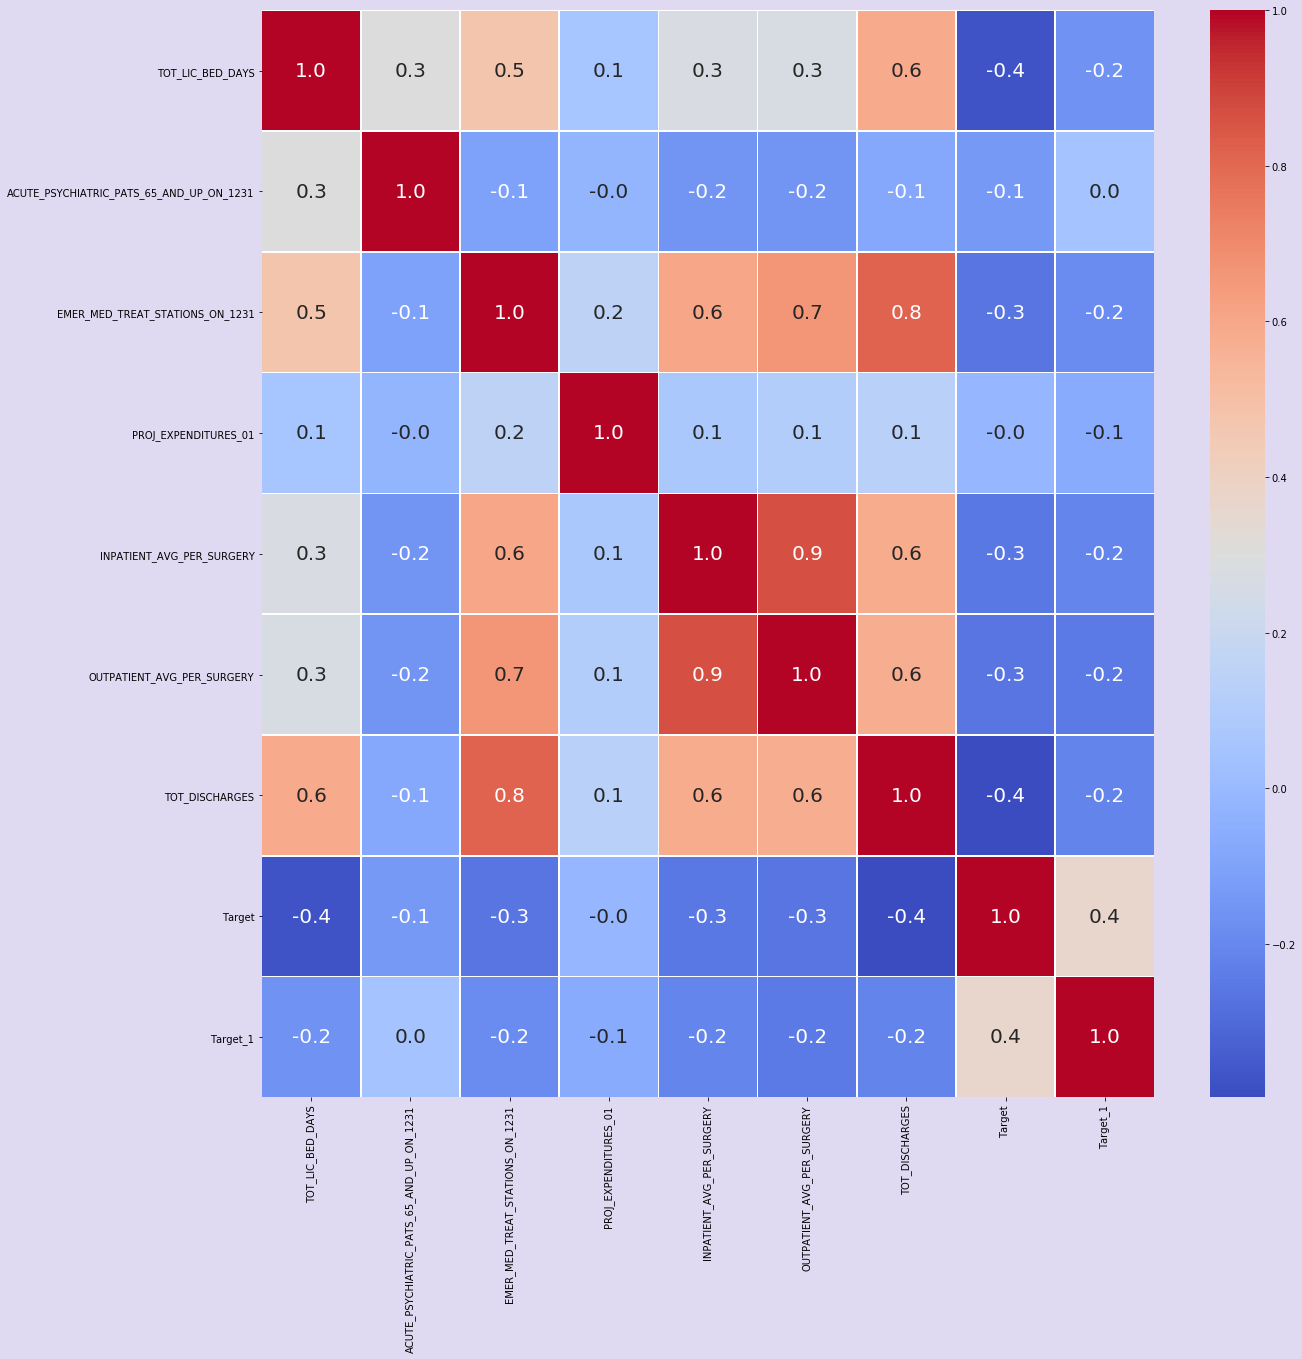

In [87]:
# View are assumed strong correlations
correlations = display.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True, linewidths=.5, cmap='coolwarm', annot_kws={'size':20}, fmt=".1f")

Text(5, 12.3, 'Heat Map')

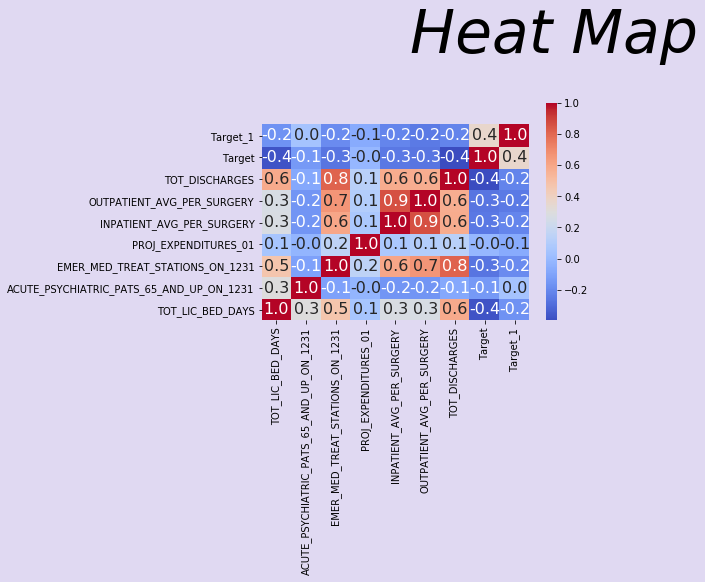

In [86]:
plt.rcParams['font.size'] = 10
bg_color = (0.88,0.85,0.95)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color
fig, ax = plt.subplots(1)
p = sns.heatmap(correlations,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':16},
                ax=ax)
# plt.xlabel('')
# plt.ylabel('')
ax.set_ylim((0,10))
plt.text(5,12.3, "Heat Map", fontsize = 60, color='Black', fontstyle='italic')

In [ ]:
p.get_figure().savefig('../../figures/heatmap.png')